In [8]:
from model import SimpleTMP

# base package
import torch,torch.nn
# probability distributions
import torch.distributions
# optimization
import torch.optim

import numpy
import scipy.signal


import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy
import torch
import numpy as np
from scipy import signal
import unittest
import os
from bvh import Bvh


import time,sys
import unittest

# Create synthetic data
def generate_sample_data(n_segments=5, n_signals=3, t_points=50, n_true_MPs=3):
    np.random.seed(42)  # For reproducibility
    
    # Generate true MPs
    true_MPs = []
    for i in range(n_true_MPs):
        mp = np.sin(np.linspace(0, (i+1)*2*np.pi, t_points))
        true_MPs.append(mp)
    true_MPs = np.array(true_MPs)
    
    # Generate weights
    data = []
    segment_lengths = []
    
    for s in range(n_segments):
        # Random segment length
        length = np.random.randint(t_points//2, t_points*2)
        segment_lengths.append(length)
        
        # Generate weights
        weights = np.random.randn(n_signals, n_true_MPs)
        
        # Time points for this segment
        t = np.linspace(0, t_points, length)
        
        # Sample MPs at these time points
        sampled_MPs = np.array([np.interp(t, np.arange(t_points), mp) for mp in true_MPs])
        
        # Generate segment
        segment = np.dot(weights, sampled_MPs)
        
        # Add noise
        segment += 0.1 * np.random.randn(*segment.shape)
        
        data.append(segment)
    
    return data, segment_lengths, true_MPs



In [6]:
data[0]

array([[ 9.50369682e-02,  1.10592453e-01, -1.00579132e-01,
         2.57769622e-02, -1.15390652e-02, -2.84980408e-02,
        -2.07976335e-01, -1.25908581e-01, -8.79206588e-02,
         7.73967342e-03, -3.34862915e-01, -4.96061105e-01,
        -7.01743110e-01, -8.55804666e-01, -8.41913432e-01,
        -1.04373054e+00, -1.25085856e+00, -1.38805603e+00,
        -1.38480413e+00, -1.46638179e+00, -1.43753773e+00,
        -1.46347775e+00, -1.36598687e+00, -1.47893273e+00,
        -1.17383065e+00, -9.10133821e-01, -9.65468336e-01,
        -9.51767594e-01, -7.67665405e-01, -8.39777272e-01,
        -7.81042534e-01, -4.36673880e-01, -4.64366848e-01,
        -4.46907201e-01, -3.12133712e-01, -2.52609205e-01,
        -4.52346710e-02,  7.77714659e-02,  1.87890613e-01,
         2.69425416e-01,  3.43656768e-01,  3.40679448e-01,
         3.97361587e-01,  4.17563189e-01,  7.90755623e-01,
         7.79173338e-01,  8.73698136e-01,  1.14720350e+00,
         1.05061196e+00,  1.31897704e+00,  1.34738148e+0

Iteration 1, VAF: -0.0530
Iteration 2, VAF: -1025714216621332889600.0000
Iteration 3, VAF: -0.0530
Iteration 4, VAF: -1025713918542256930816.0000
Iteration 5, VAF: -0.0530
Iteration 6, VAF: -1025713620464588423168.0000
Iteration 7, VAF: -0.0530
Iteration 8, VAF: -1025713322388280311808.0000
Iteration 9, VAF: -0.0530
Iteration 10, VAF: -1025713024313533792256.0000
Iteration 11, VAF: -0.0530
Iteration 12, VAF: -1025712726240276250624.0000
Iteration 13, VAF: -0.0530
Iteration 14, VAF: -1025712428168264286208.0000
Iteration 15, VAF: -0.0530
Iteration 16, VAF: -1025712130097639587840.0000
Iteration 17, VAF: -0.0530
Iteration 18, VAF: -1025711832028495347712.0000
Iteration 19, VAF: -0.0530
Iteration 20, VAF: -1025711533961030008832.0000
Iteration 21, VAF: -0.0530
Iteration 22, VAF: -1025711235894995451904.0000
Iteration 23, VAF: -0.0530
Iteration 24, VAF: -1025710937830273581056.0000
Iteration 25, VAF: -0.0530
Iteration 26, VAF: -1025710639767292608512.0000
Iteration 27, VAF: -0.0530
Iterati

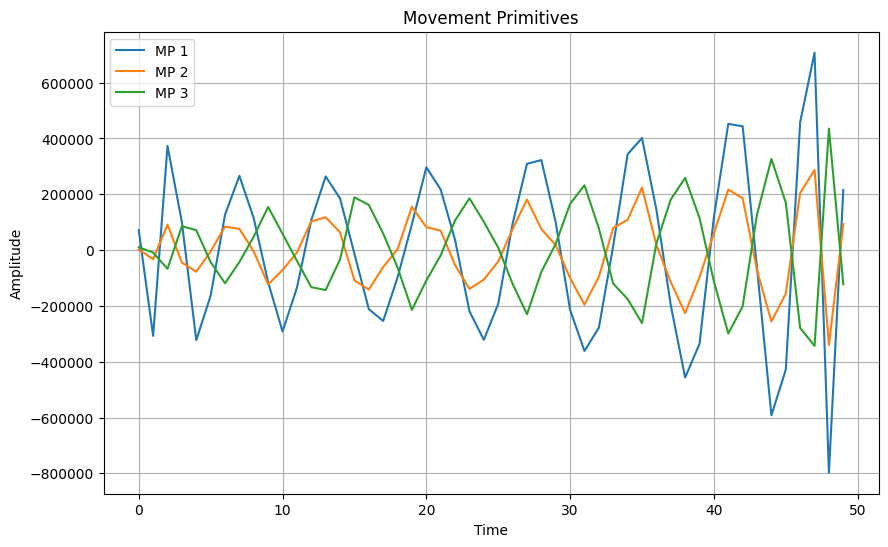

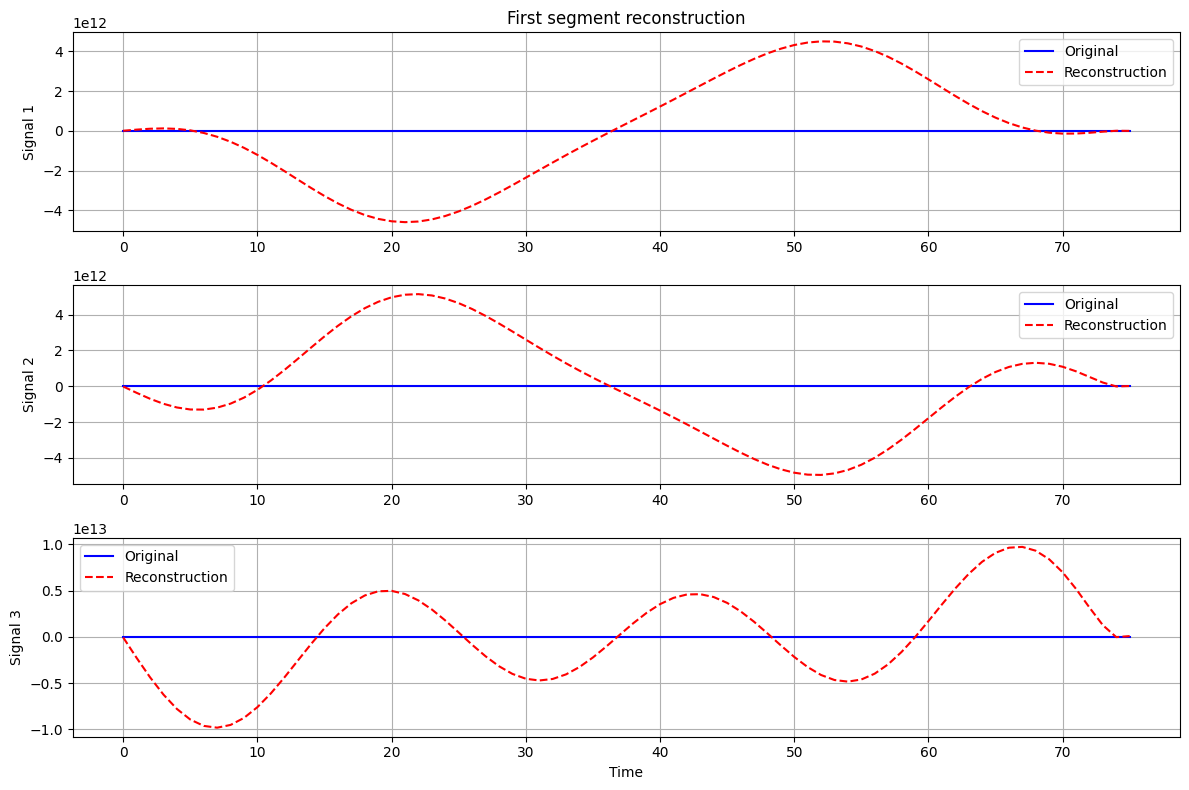

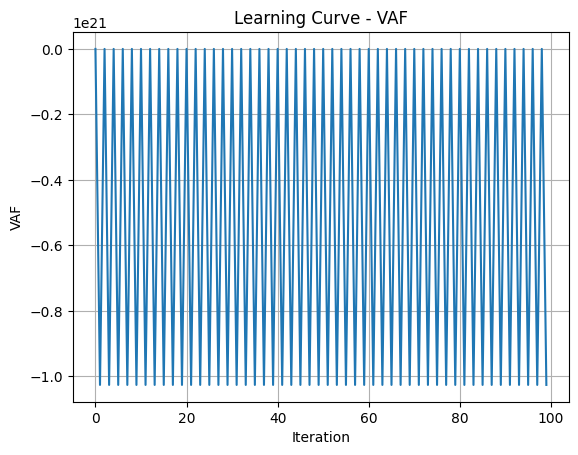

In [7]:
# Generate sample data
data, segment_lengths, true_MPs = generate_sample_data()

# Create and train model
model = SimpleTMP(num_t_points=50, num_MPs=3)
vaf_history = model.learn(data)

# Make predictions
predictions = model.predict(segment_lengths)

# Plot results
model.plot_MPs()
model.plot_reconstruction(data[0], predictions[0], "First segment reconstruction")

# Show learning curve
plt.figure()
plt.plot(vaf_history)
plt.title('Learning Curve - VAF')
plt.xlabel('Iteration')
plt.ylabel('VAF')
plt.grid(True)
plt.show()